In [2]:
import networkx as nx

path = "../../../resources/input/24.2.in"

In [73]:
import pandas as pd

nodes = []
edges = []

with open(path) as f:
    values, gates = f.read().strip().split("\n\n")
    for line in values.split("\n"):
        a, b = line.split(": ")
        nodes.append({"id": a, "label": b})
    for line in gates.split("\n"):
        a, gate, b, _, c = line.split()
        nodes.append({"id": c, "label": gate})
        edges.append({"source": a, "target": c})
        edges.append({"source": b, "target": c})

nodes = pd.DataFrame.from_records(nodes)
edges = pd.DataFrame.from_records(edges)

nodes.to_csv("nodes.csv", index=False)
edges.to_csv("edges.csv", index=False)

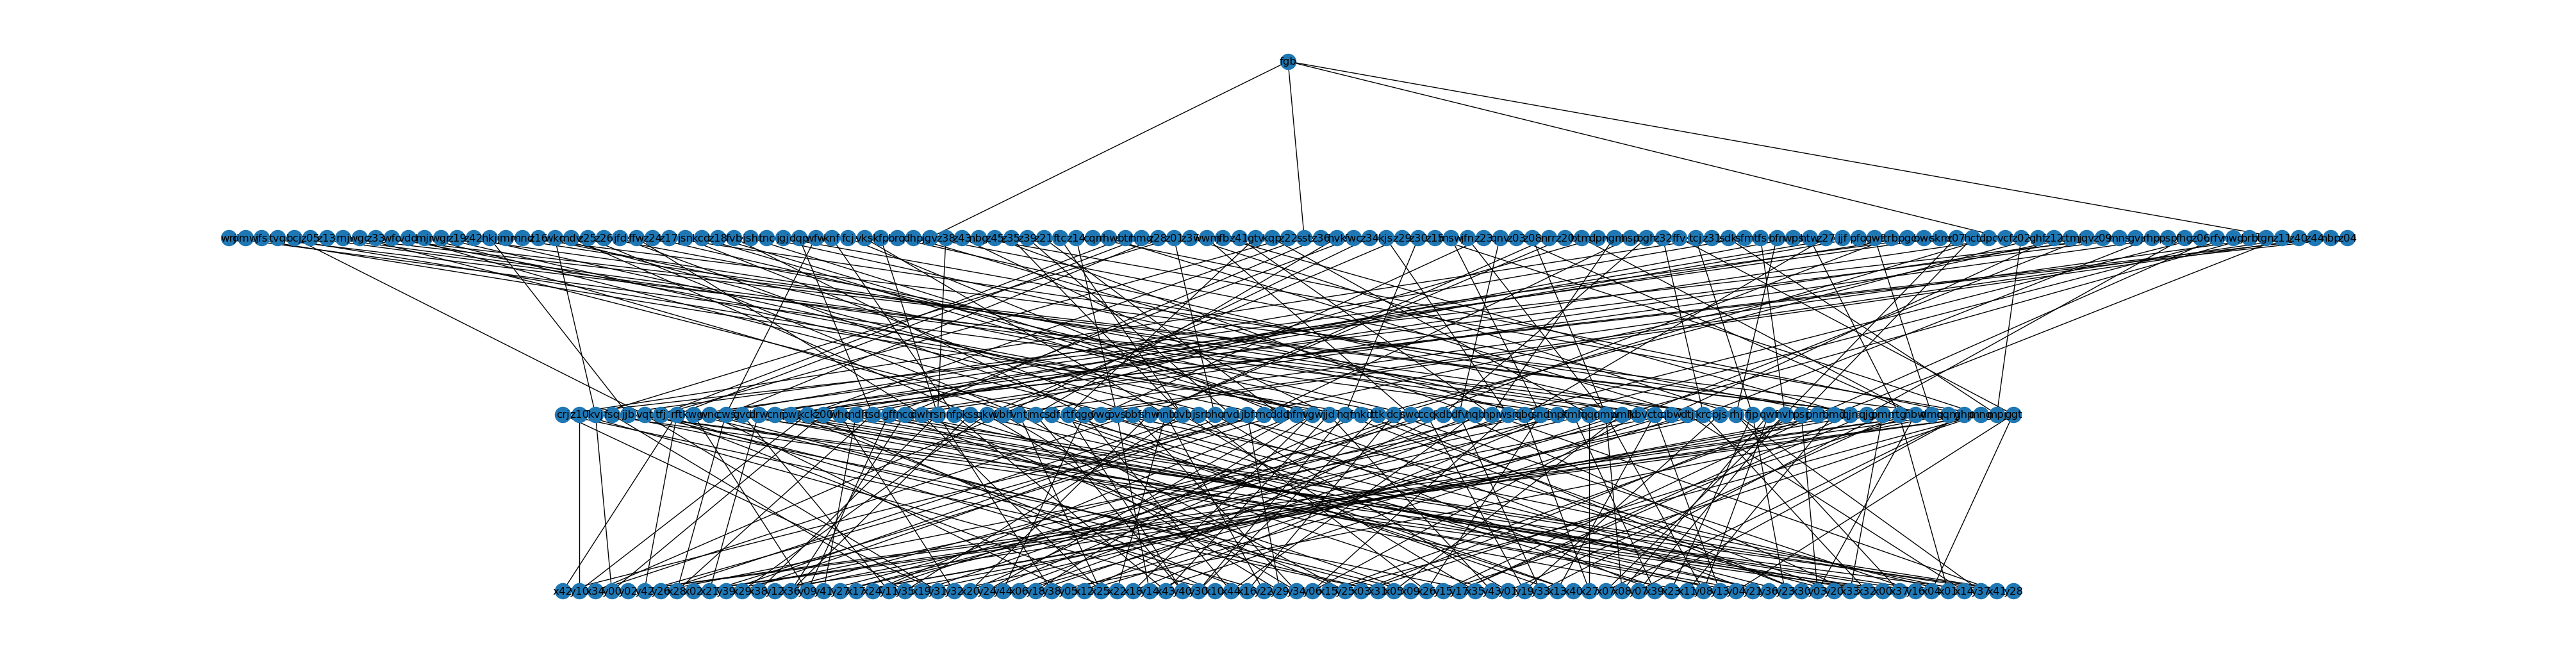

In [66]:
import matplotlib.pyplot as plt

layers = nx.bfs_layers(g, xs+ys)
for i, layer in enumerate(layers):
    for node in layer:
        nx.set_node_attributes(g, {n: i for n in layer}, "depth")

plt.figure(figsize=(40, 10))
pos = nx.spring_layout(g)
pos = nx.multipartite_layout(g, subset_key="depth", align="horizontal")
nx.draw(g, pos=pos, with_labels=True)